In [3]:
# 1. Imports and Environment Setup
import os
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix

In [1]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
import cv2
import imghdr

In [10]:
data_dir = 'data' 

In [11]:
image_exts = ['jpeg','jpg', 'png']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\happy\autumn-woman-happy-smiling-feeling-free-fall-nature-nature-p.jpg.txt
Image not in ext list data\happy\bae816b4-77f0-416e-9fbf-0a7d9e4ee3ac.jpeg
Image not in ext list data\happy\cinematic-shot-happy-person-open-arms-cinematic-shot-happy-p.jpg.txt
Image not in ext list data\happy\depositphotos_79186110-Happy-people-laughing-a-being-happy.jpg.txt
Image not in ext list data\happy\diverse-happy-people-united-concept-101678776.jpg.txt
Image not in ext list data\happy\facebook_3e56ddfed9ee642b4839_6d687bf0-cd02-43d8-938a-c27430.jpg.txt
Image not in ext list data\happy\goup-happy-people-group-jumping-isolated-white-background-35.jpg.txt
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\habits-that-define-very-happy-people.jpg
Image not in ext list data\happy\Happy People.jpg
Image not in ext list data\happy\happy-indian-mother-having-fun-with-her-daughter-outdoor-fam.jpg
Image not in ext list data\happy\h

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 204 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

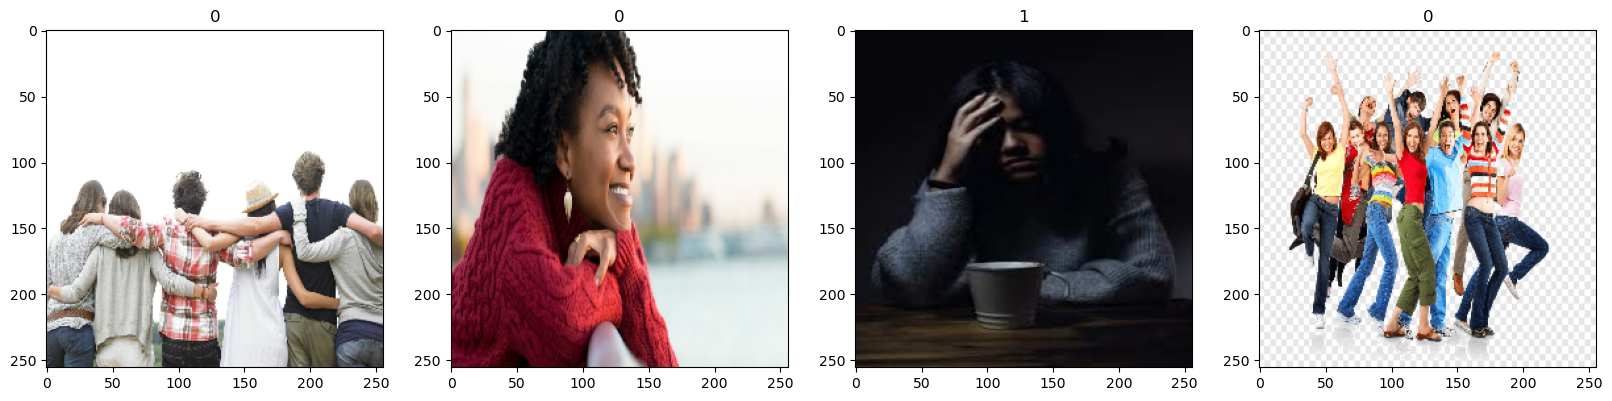

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[2.66288728e-01, 2.46680886e-01, 2.62367159e-01],
          [2.68474013e-01, 2.48866186e-01, 2.64552444e-01],
          [2.67057538e-01, 2.54746616e-01, 2.68000573e-01],
          ...,
          [4.69659299e-01, 4.38286752e-01, 4.26522046e-01],
          [4.61557418e-01, 4.30184871e-01, 4.18420166e-01],
          [4.59658384e-01, 4.28285837e-01, 4.16521132e-01]],
 
         [[2.52259731e-01, 2.32651889e-01, 2.48338163e-01],
          [2.54918009e-01, 2.35310152e-01, 2.50996441e-01],
          [2.56695449e-01, 2.37412870e-01, 2.52990723e-01],
          ...,
          [4.62881774e-01, 4.31509227e-01, 4.19744521e-01],
          [4.62654620e-01, 4.31282073e-01, 4.19517368e-01],
          [4.62622553e-01, 4.31250006e-01, 4.19485301e-01]],
 
         [[2.40318626e-01, 2.20710784e-01, 2.36397058e-01],
          [2.46814921e-01, 2.27207080e-01, 2.42893353e-01],
          [2.34679937e-01, 2.33776137e-01, 2.42071182e-01],
          ...,
          [4.64172840e-01, 4.32800293e-01, 4.2103

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train_size

4

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\Sreeram R\anaco\envs\tfenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 907ms/step - accuracy: 0.4854 - loss: 0.8890 - val_accuracy: 0.7188 - val_loss: 0.6655
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 799ms/step - accuracy: 0.6396 - loss: 0.6559 - val_accuracy: 0.5000 - val_loss: 0.7121
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 678ms/step - accuracy: 0.4625 - loss: 0.7107 - val_accuracy: 0.8125 - val_loss: 0.6374
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 863ms/step - accuracy: 0.8135 - loss: 0.6056 - val_accuracy: 0.7188 - val_loss: 0.5938
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 868ms/step - accuracy: 0.7094 - loss: 0.5128 - val_accuracy: 0.8750 - val_loss: 0.4607
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 727ms/step - accuracy: 0.7615 - loss: 0.5348 - val_accuracy: 0.7500 - val_loss: 0.6645
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7479 - loss: 0.4658 - val_accuracy: 0.8438 - val_loss: 0.4654
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 731ms/step - accuracy: 0.8375 - loss: 0.4490 - val_accuracy: 0.8750 - val_loss: 0.

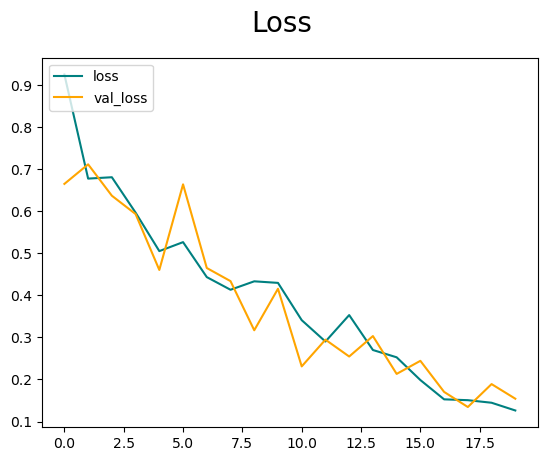

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

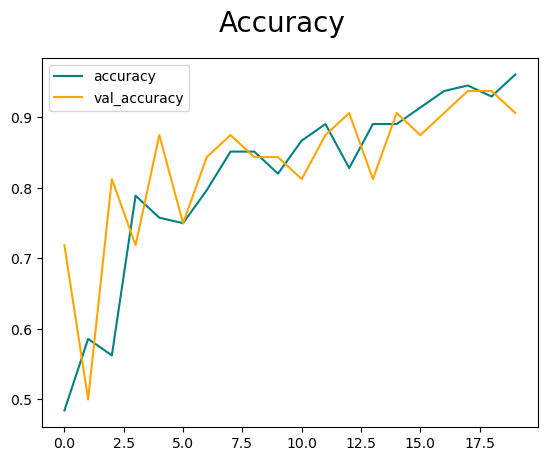

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [39]:
import cv2

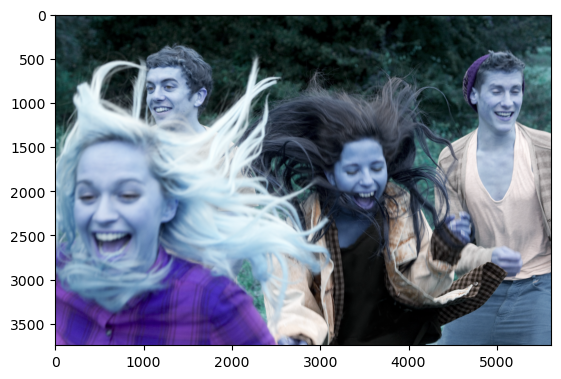

In [40]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

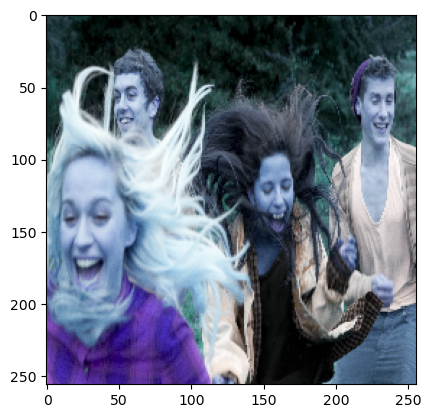

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


In [43]:
yhat

array([[0.2645345]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [45]:
from tensorflow.keras.models import load_model

In [46]:
model.save(os.path.join('models','imageclassifier.h5'))

In [48]:
new_model = load_model('models/imageclassifier.h5')

In [49]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


array([[0.2645345]], dtype=float32)